### 함수로 만들어준다.

드렁가는 라이브러리 | 들어가는 함수 | 설명
----------|----------|----------
math|math.log10()|
numpy|set_printoptions(),set_option()|
pandas|DataFrame(),groupby(),join,.read_csv()|
numpy.linalg|norm()|
IPython.display||

나오는 변수 | 들어가는 변수 | 설명
----------|----------|----------
movies| | 무비 파일을 가져온다.
movieGenres|movies|movies에서 index= movieId와 columne=genres만 가져온다.
totalItems|movies| movies의 전체 index 갯수를 세준다.
genres|movieGenres,totalItems| (1)genres['moviecount']  (2) genres['idf']
movieGenreWeights |movieGenres,genres |둘을 join해준다.
movieWeights|(1)movies (2)movieGenreWeights| (1)의 movieID와 (2)의 genres,idf를 가져오는것이다.
movieNorms|(1)movieWeights|(1)의 idf들을 Norm시키는 과정이다.
norms|(1)movieNorms|(1)에서 norm값들을 가져온다.
normalizedMovieWeights|(1)movieWeights,   (2)norms|(1)의 idf 에 (2)의 Norm을 나눠 nomalize화 하는것이다.
sims|(1)normalizedMovieWeights  (2)movieWeights| (1)과 (1)의 Transform을 곱해 Cosine similarity를 구해준다.
ratings|| 평점의 csv파일을 가져온다.
train|(1)ratings|정확도 테스트를 위해 random하게 정해진 train 들을 가져온다.(csv에 train과 test가 반영되어있다 이미)
test|(1)ratings|정확도 테스트를 위해 random하게 정해진 test 들을 가져온다.


In [1]:
import math
import numpy as np
import pandas as pd
from IPython.display import Image, display
from numpy import linalg as LA

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)


movies = pd.read_csv('../src/movies_w_imgurl.csv')

movieGenres = pd.DataFrame(
    data=movies['genres']
    .str
    .split('|')   
    .apply(pd.Series)
    .stack()
    ,columns=['genre'])
movieGenres.index = movieGenres.index.droplevel(1)

totalItems = movies.shape[0]
genres = pd.DataFrame(data = movieGenres.groupby('genre')['genre'].count())
genres.columns= ['movieCount']
genres['idf'] = genres['movieCount'].apply(lambda x: math.log10(totalItems/x))


movieGenreWeights = movieGenres.join(genres['idf'], on='genre')

movieWeights = movies[['movieId']]

for genre in genres.index:
    movieWeights = movieWeights\
    .join(movieGenreWeights[movieGenreWeights['genre'] == genre]
    [['idf']].rename(columns={'idf':genre})) 
    movieWeights.fillna(0, inplace=True)
    
movieNorms = pd.DataFrame(
    data=LA.norm(movieWeights
                 .iloc[:,1:] 
                 .values, 
                ord=2, axis=1),

    columns=['norm2'])    

normalizedMovieWeights = pd.DataFrame(index=movieWeights.index) #빈 데이타 프레임만들기
norms = movieNorms['norm2']
for genre in genres.index:
    normalizedMovieWeights[genre] = movieWeights[genre].divide(norms)
    
sims = pd.DataFrame(data=np.matmul(normalizedMovieWeights, normalizedMovieWeights.T), index=movieWeights['movieId'])
sims.columns = index=movieWeights['movieId']


ratings = pd.read_csv('../src/ratings-9_1.csv')
train = ratings[ratings['type'] == 'train'][['userId', 'movieId', 'rating']]
test = ratings[ratings['type'] == 'test'][['userId', 'movieId', 'rating']]



In [11]:
sims

movieId,1,2,3,4,5,6,7,8,9,10,...,161830,161918,161944,162376,162542,162672,163056,163949,164977,164979
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.00,0.81,0.09,0.09,0.19,0.00,0.09,0.64,0.00,0.25,...,0.00,0.19,0.00,0.00,0.00,0.29,0.47,0.0,0.19,0.0
2,0.81,1.00,0.00,0.00,0.00,0.00,0.00,0.80,0.00,0.32,...,0.00,0.23,0.00,0.00,0.00,0.36,0.58,0.0,0.00,0.0
3,0.09,0.00,1.00,0.94,0.50,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.63,0.54,0.00,0.0,0.50,0.0
4,0.09,0.00,0.94,1.00,0.47,0.00,0.94,0.00,0.00,0.00,...,0.08,0.00,0.34,0.34,0.60,0.60,0.00,0.0,0.47,0.0
5,0.19,0.00,0.50,0.47,1.00,0.00,0.50,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0
6,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.55,0.57,...,0.29,0.22,0.00,0.00,0.35,0.00,0.22,0.0,0.00,0.0
7,0.09,0.00,1.00,0.94,0.50,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.63,0.54,0.00,0.0,0.50,0.0
8,0.64,0.80,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.40,...,0.00,0.29,0.00,0.00,0.00,0.45,0.28,0.0,0.00,0.0
9,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.00,1.00,0.55,...,0.00,0.41,0.00,0.00,0.00,0.00,0.39,0.0,0.00,0.0


In [10]:
ratings

,userId,movieId,rating,timestamp,type
0,1,31,2.5,1260759144,train
1,1,1029,3.0,1260759179,test
2,1,1061,3.0,1260759182,train
3,1,1129,2.0,1260759185,train
4,1,1172,4.0,1260759205,train
5,1,1263,2.0,1260759151,test
6,1,1287,2.0,1260759187,train
7,1,1293,2.0,1260759148,train
8,1,1339,3.5,1260759125,train
9,1,1343,2.0,1260759131,train


In [2]:

def users(userId,train):
    ratings = pd.read_csv('../src/ratings-9_1.csv')
    #train = ratings[ratings['type'] == 'train'][['userId', 'movieId', 'rating']]
    test = ratings[ratings['type'] == 'test'][['userId', 'movieId', 'rating']]
    
    sumDataframe=[]
    
    #for i in userId:
    #    userId = i
    userRatings = train[train['userId'] == userId][['movieId', 'rating']]

    recSimSums = sims.loc[userRatings['movieId'].values, :].sum().values
    recWeightedRatingSums = np.matmul(sims.loc[userRatings['movieId'].values, :].T.values, userRatings['rating'].values)
    recItemRatings = pd.DataFrame(data=np.divide(recWeightedRatingSums, recSimSums), index=sims.index)
    recItemRatings.columns = ['prediction']   
    #userRatings = train[train['userId'] == userId][['movieId', 'rating']]
    #topRatings = userRatings.sort_values(by='rating', ascending=False).head(5)

    #return recItemRatings
    predictionAvg = recItemRatings['prediction'].sum()/len(recItemRatings['prediction'])

    recItemRatings['prediction']/=predictionAvg

    highRatings=5
    return recItemRatings*highRatings/2





In [3]:
user_number_list=[99,13,14,111,33,345,55,66,44,7]
#movied_number=


In [4]:
def multiRec(user_number_list,train):
    multi=0
    for i in user_number_list:
        multi += users(i,train)
    multi/=len(user_number_list)
    multi=multi.sort_values(by='prediction', ascending=False)
    return multi


In [5]:
def want_test(user_number,movied_number,train):


    print "유저",user_number,"의 영화",movied_number,"의 평점은 =", users(user_number,train)['prediction'][movied_number]

    count=0
    k=users(user_number,train).sort_values(by='prediction',ascending=False)['prediction'][movied_number]
    for i in users(user_number,train).sort_values(by='prediction',ascending=False)['prediction']:
        if i >=k:
                count+=1

    print "전체",9125,"중에" , count, "등"

SyntaxError: invalid syntax (<ipython-input-5-1b75684912d4>, line 4)

In [6]:
def check(user_number_list,num,train):
    for j in user_number_list:
         want_test(j,num,train) # User 99 => 400등,  13=> 30등,  14= 1500등

In [288]:
multiRec=multiRec(user_number_list,train)
multiRec

/Users/ikku_study/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


,prediction
movieId,
8700,2.73
5611,2.73
4445,2.73
55442,2.72
107559,2.72
61236,2.72
5651,2.72
27611,2.72
42351,2.72


In [286]:
a=[9999]
multiRec(a,train)

/Users/ikku_study/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


,prediction
movieId,
3380,2.88
5795,2.88
1154,2.88
1153,2.88
2066,2.88
4426,2.88
746,2.88
5169,2.88
3292,2.88


In [7]:
multiRec([13],train)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


,prediction
movieId,
1797,3.08
4458,3.08
4459,3.08
37,3.08
4453,3.08
4861,3.08
31547,3.07
7156,3.07
120821,3.07


In [298]:
check([13],3380,train)

유저 13 의 영화 3380 의 평점은 = nan
전체 9125 중에 0 등


/Users/ikku_study/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


In [297]:
check(user_number_list,3380,train)

유저 99 의 영화 3380 의 평점은 = 2.89126529037


/Users/ikku_study/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


전체 9125 중에 412 등
유저 13 의 영화 3380 의 평점은 = nan
전체 9125 중에 0 등
유저 14 의 영화 3380 의 평점은 = nan
전체 9125 중에 0 등
유저 111 의 영화 3380 의 평점은 = 2.82967953983
전체 9125 중에 381 등
유저 33 의 영화 3380 의 평점은 = nan
전체 9125 중에 0 등
유저 345 의 영화 3380 의 평점은 = 2.84506029481
전체 9125 중에 66 등
유저 55 의 영화 3380 의 평점은 = nan
전체 9125 중에 0 등
유저 66 의 영화 3380 의 평점은 = 2.76730948324
전체 9125 중에 3178 등
유저 44 의 영화 3380 의 평점은 = nan
전체 9125 중에 0 등
유저 7 의 영화 3380 의 평점은 = nan
전체 9125 중에 0 등


In [234]:
def displayMovies(movieIds,ratings=[]):
    i = 0
    for movieId in movieIds:
        mov = movies[movies['movieId'] == movieId].iloc[0]
        display(Image(mov.imgurl))
        print(mov.title)
        print(mov.genres)
        if i < len(ratings):
            print("hi")
            print(ratings[i])
        i +=1

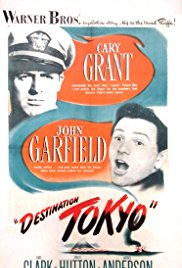

Destination Tokyo (1943)
Adventure|War


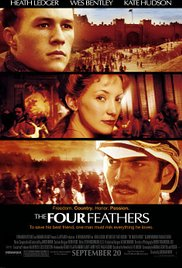

Four Feathers, The (2002)
Adventure|War


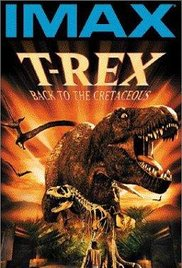

T-Rex: Back to the Cretaceous (1998)
Adventure|Documentary|IMAX


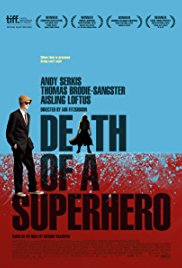

Am Ende eiens viel zu kurzen Tages (Death of a superhero) (2011)
Animation|Drama


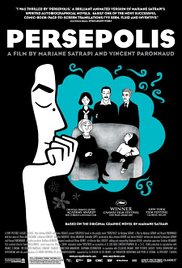

Persepolis (2007)
Animation|Drama


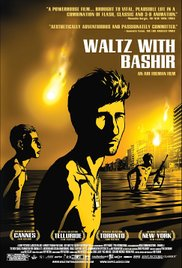

Waltz with Bashir (Vals im Bashir) (2008)
Animation|Documentary|Drama|War


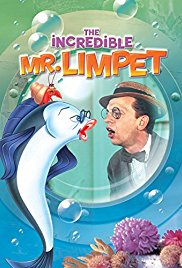

Incredible Mr. Limpet, The (1964)
Animation|Comedy|War


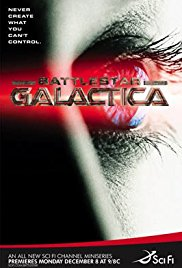

Battlestar Galactica (2003)
Drama|Sci-Fi|War


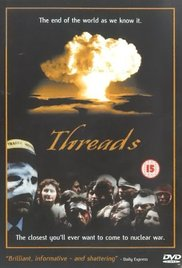

Threads (1984)
Drama|Sci-Fi|War


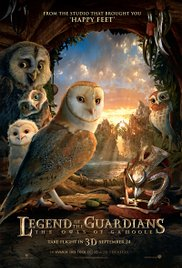

Legend of the Guardians: The Owls of Ga'Hoole (2010)
Adventure|Animation|Fantasy|IMAX


In [235]:
displayMovies(multiRec.sort_values(by='prediction', ascending=False).head(10).index)

### 정확도를 분석해본다.

In [236]:
userTestRatings = pd.DataFrame(data=test[test['userId'] == userId])
temp = userTestRatings.join(recItemRatings.loc[userTestRatings['movieId']], on='movieId')
mae = (temp['rating'] - temp['prediction']).abs().mean()
rmse = math.sqrt((temp['rating'] - temp['prediction']).pow(2).mean())
print(" MAE:", mae)
print("RMSE:", rmse)

NameError: name 'recItemRatings' is not defined

# 방식 2.

* A,B,C,D를 한 그룹으로 생각후 Alist+Blist+Clist+Dlist를 가지고  영화추천받기.

In [238]:
user_number_list=[99,13,14,111,33,345,55,66,44,7]

In [239]:
count=0
_list=[]
for i in train['userId']:
    index=train.index[count]
    if i in user_number_list:
        _list.append([ 9999,train['movieId'][index] , train['rating'][index]])
    count+=1

In [240]:
df=pd.DataFrame(_list,columns=['userId','movieId','rating'])

In [269]:
train=train.append(df)

In [270]:
train

,userId,movieId,rating
0,1,31,2.5
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
6,1,1287,2.0
7,1,1293,2.0
8,1,1339,3.5
9,1,1343,2.0
10,1,1371,2.5
11,1,1405,1.0
